<img src="images/kiksmeisedwengougent.png" alt="Banner" width="1100"/>

<div>
    <font color=#690027 markdown="1"> 
        <h1>ZEENIVEAU IN OOSTENDE - REGRESSIE</h1> 
    </font>
</div>

<div class="alert alert-box alert-success">
In deze notebook wordt onderzocht of het toekomstige zeeniveau in Oostende beter voorspeld kan worden door toepassing van <em>regressie met een parabool i.p.v. een rechte, of nog beter met een andere kromme</em>.<br>
Er wordt opnieuw gebruikgemaakt van de functionaliteiten van de Python-module <em>SciPy</em>. <br>
    Het belang van <em>standaardiseren</em> wordt duidelijk gemaakt en het fenomeen <em>overfitting</em> wordt geïllustreerd. 
</div>

<div class="alert alert-box alert-warning">
Deze notebook volgt op de notebook 'Zeeniveau in Oostende - Lineaire regressie'.<br>
    In de notebook 'Lineaire Regressie' wordt uitgelegd hoe je met de module SciPy een regressielijn bepaalt bij gegeven data.
</div>

Het zeeniveau wordt beïnvloed door o.a. stijging van het volume van de watermassa bij een stijgende temperatuur, afsmeltende ijskappen en gletsjers, veranderende opslag van oppervlaktewater en grondwater. De globale klimaatverandering leidt nog deze eeuw tot een stijging van het zeeniveau met 18 tot 59 cm [1].<br>

**We bekijken de evolutie van het zeeniveau aan de Belgische kust sinds 1951. Oostende is het meetpunt aan onze kust met de langste ononderbroken meetreeks.** 

De hoogte van een punt wordt gemeten ten opzichte van de zeespiegel. <br>De zeespiegel staat echter niet altijd op dezelfde hoogte. Eb en vloed zorgen voor een verschil dat aan de Belgische kust ongeveer vier meter bedraagt. <br>Men heeft dus een referentiepunt nodig. Het gemiddelde zeeniveau bij eb in Oostende wordt gebruikt als nulpeil: de Tweede Algemene Waterpassing (TAW). In Nederland heeft men de gemiddelde zeespiegel tussen eb en vloed genomen: het Normaal Amsterdams Peil (NAP). Het TAW-referentiepunt ligt 2,33 meter onder het NAP-referentiepunt. Om nationale hoogtemetingen met elkaar te vergelijken, moet men rekening houden met de verschillende referentiepunten [2].<br><br>
**Het zeeniveau wordt uitgedrukt in mm RLR (Revised Local Reference); data t.o.v. de lokale referentie worden omgezet naar data t.o.v. het internationaal referentieniveau.**

Het zeeniveau in Oostende wordt opgemeten sinds 1951. De waarden van deze metingen zijn terug te vinden op de website van de Vlaamse Milieumaatschappij [3]. <br><br>
Voor deze notebook zijn de data beschikbaar in het bestand `zeeniveau.csv` in de map `data`. <br>De data bevatten telkens het jaargemiddeld zeeniveau (in mm RLR) in Oostende voor een bepaald jaar en het jaartal.

### Opdracht 1
- Visualiseer de data uit het csv-bestand (zie ook de vorige notebook).<br>Stel het bereik van de assen zo in dat er ruimte is voor een 'blik op de toekomst'. 
- Het spreidingsdiagram vertoont een trend. Bepaal de vergelijking van een parabool als trendlijn. 
- Teken ze erbij op de grafiek.
- Vind je de parabool geschikt als trendlijn?
- Het jaargemiddelde zeeniveau gemeten in 2018 en 2019 bedraagt resp. 7067 en 7129 mm RLR [4]. Voeg deze data toe aan de grafiek.
- Is je van mening over 'Vind je de parabool geschikt als trendlijn?' nog dezelfde?

### Opdracht 2
- Bepaal een derdegraadskromme of tiendegraadskromme als trendlijn. 
- Teken ze erbij op de grafiek.
- Zijn deze krommen geschikt als trendlijn?

   ## Voorbeeldoplossing

### Nodige modules importeren

In [1]:
# voorbeeldscript
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

   ## Voorbeeldoplossing opdracht 1

<div>
    <font color=#690027 markdown="1"> 
        <h2>1. Inlezen van de data</h2> 
    </font>
</div>

Het zeeniveau in Oostende wordt opgemeten sinds 1951. De waarden van deze metingen zijn terug te vinden op de website van de Vlaamse Milieumaatschappij [3].

In [2]:
# voorbeeldscript
zeeniveau = pd.read_csv("data/zeeniveau.csv", header=None) # in te lezen tabel heeft geen hoofding

<div>
    <font color=#690027 markdown="1"> 
        <h2>2. Puntenwolk</h2> 
    </font>
</div>

In [3]:
# voorbeeldscript
x = zeeniveau[0]   
y = zeeniveau[1]   
x = np.array(x)
y = np.array(y)

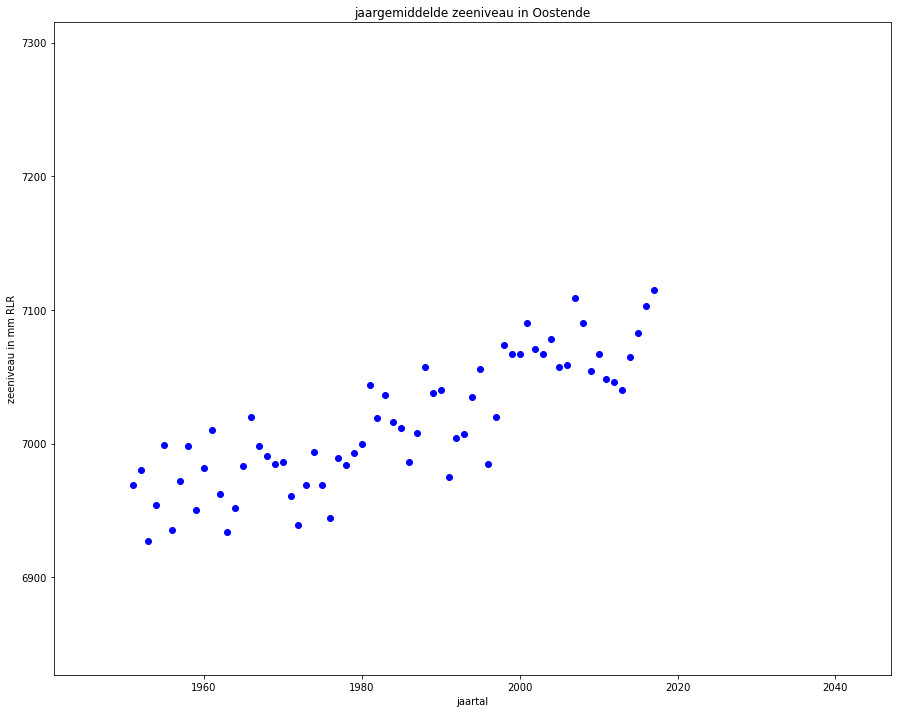

In [4]:
# voorbeeldscript
plt.figure(figsize=(15,12))      

# bereik zo kiezen opdat geschikt voor blik op toekomst
plt.xlim(x.min()-10, x.max()+30)
plt.ylim(y.min()-100, y.max()+200)
plt.title("jaargemiddelde zeeniveau in Oostende")
plt.xlabel("jaartal")
plt.ylabel("zeeniveau in mm RLR")

plt.scatter(x, y, color="blue", marker="o")

plt.show()

<div>
    <font color=#690027 markdown="1"> 
        <h2>3. Kwadratische regressie</h2> 
    </font>
</div>

In [5]:
# voorbeeldscript
def parabool(x, a, b, c):
    """Voorschrift van parabool met parameters a, b en c."""
    return a * x**2 + b * x + c

def kwadreg(x, y):
    popt, pcov = curve_fit(parabool, x, y)
    a, b, c = popt
    print("y = ", a, "x² +", b, "x +", c)
    return a, b, c

In [6]:
# voorbeeldscript
a, b, c = kwadreg(x, y)

y =  0.016477624751794484 x² + -63.32694556891428 x + 67789.5271779725


Antwoord: De vergelijking van de parabool is (bij benadering): $y= 0,016 x² - 63,327 x + 67789,527$.

In [7]:
# voorbeeldscript
x_regressielijn = np.arange(1951, 2040, 10)
y_regressielijn = parabool(x_regressielijn, a, b, c)

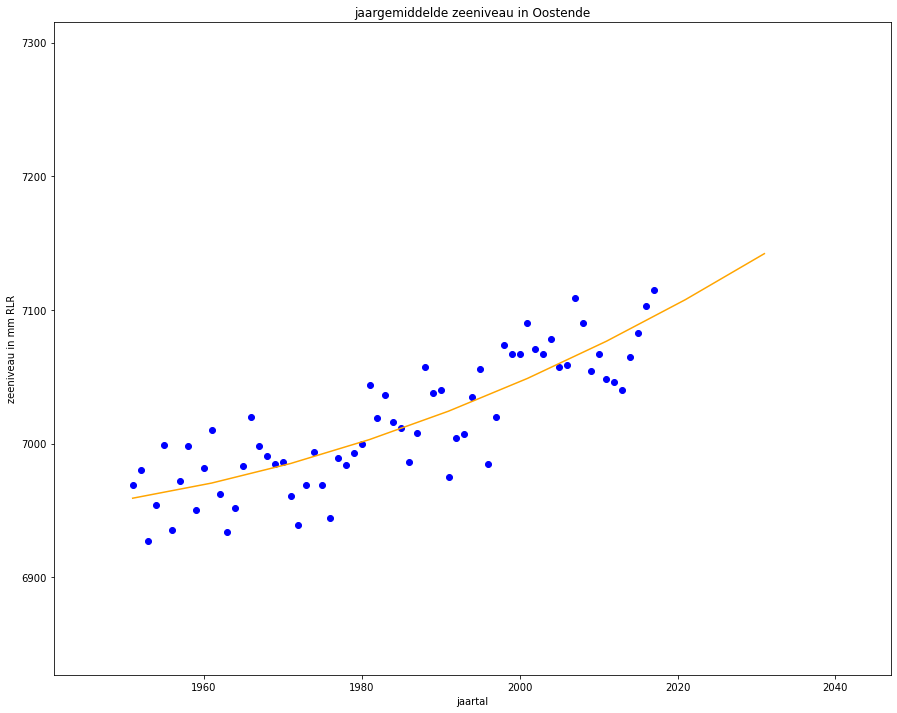

In [8]:
# voorbeeldscript
plt.figure(figsize=(15,12))      

# bereik zo kiezen opdat geschikt voor blik op toekomst
plt.xlim(x.min()-10, x.max()+30)
plt.ylim(y.min()-100, y.max()+200)
plt.title("jaargemiddelde zeeniveau in Oostende")
plt.xlabel("jaartal")
plt.ylabel("zeeniveau in mm RLR")

plt.scatter(x, y, color="blue", marker="o")
plt.plot(x_regressielijn, y_regressielijn, color="orange")

plt.show()

Antwoord: De parabool lijkt geschikt als trendlijn.

Laat ook de meetwaarden zien van 2018 en 2019. 

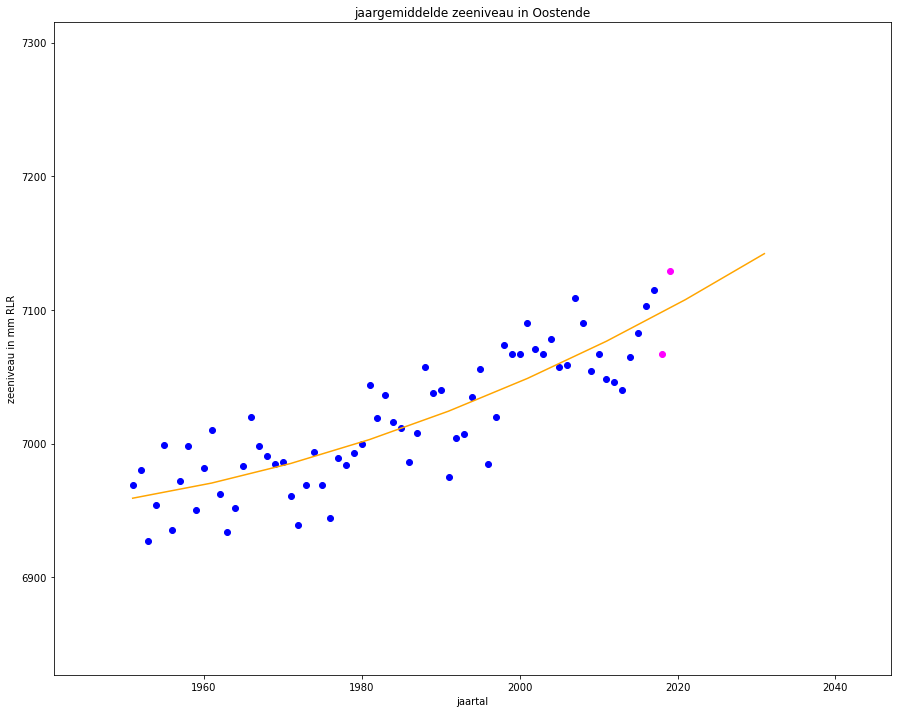

In [13]:
# voorbeeldscript
plt.figure(figsize=(15,12))      

# bereik zo kiezen opdat geschikt voor blik op toekomst
plt.xlim(x.min()-10, x.max()+30)
plt.ylim(y.min()-100, y.max()+200)
plt.title("jaargemiddelde zeeniveau in Oostende")
plt.xlabel("jaartal")
plt.ylabel("zeeniveau in mm RLR")

plt.scatter(x, y, color="blue", marker="o")
plt.plot(x_regressielijn, y_regressielijn, color="orange")
plt.plot(2018, 7067, color="magenta", marker="o")
plt.plot(2019, 7129, color="magenta", marker="o")

plt.show()

Antwoord: De parabool lijkt nog steeds geschikt als trendlijn.

   ## Voorbeeldoplossing opdracht 2: Een andere kromme als regressielijn 

<div>
    <font color=#690027 markdown="1"> 
        <h2>4. Derdegraadskromme als regressielijn</h2> 
    </font>
</div>

Passen we dezelfde methode toe als hierboven bij de parabool, dan vindt `curve_fit()` een kromme waarvan de grafiek buiten het bereik van het grafiekscherm valt. Probeer maar zelf! <br>
Dat komt omdat het rekenwerk de mist ingaat door de grote waarden in de dataset. Daarom worden de data gestandaardiseerd.

<div class="alert alert-box alert-warning">
Bekijk eventueel de notebook 'Standaardiseren' van het leerpad 'Lineaire regressie' van Python in de Wiskundeles.
</div>

De data worden als volgt **gestandaardiseerd**: van elk gegeven uit de trainingdata wordt het gemiddelde afgetrokken en vervolgens wordt het resultaat gedeeld door de standaardafwijking. Men berekent m.a.w. van alle trainingdata de Z-score. <br> Zo komen de meeste gegevens terecht tussen -1 en 1. <br>
Merk op dat men de volledige dataset op dezelfde manier standaardiseert. Men doet dus net hetzelfde met de testdata: men gebruikt er ook het gemiddelde en de standaardafwijking van de **trainingdata**. 

<div class="alert alert-box alert-info">
Rekenen met vrij grote getallen leidt al snel tot nog grotere getallen en tot numerieke instabiliteit, dat is een van de redenen waarom de data worden gestandaardiseerd. Standaardiseren van variabelen houdt in dat men de variabelen op zo'n manier herschaalt dat men variabelen van bv. een verschillende grootteorde of in een verschillende eenheid met elkaar kan vergelijken of in verband kan brengen. De correlatie tussen bivariate gegevens bv. kan men visueel inschatten door de overeenkomstige puntenwolk te bekijken, de vorm hiervan is echter maar betrouwbaar als de gegevens gestandaardiseerd zijn. Ook zijn sommige algoritmes uit machine learning pas bruikbaar als de data gestandaardiseerd zijn, omdat die algoritmes zo opgesteld zijn.
    </div>

In [16]:
x_std = (x-np.mean(x))/np.std(x)
y_std = (y-np.mean(y))/np.std(y)

In [17]:
print(x_std, y_std)

[-1.70638938 -1.65468061 -1.60297184 -1.55126307 -1.4995543  -1.44784553
 -1.39613676 -1.34442799 -1.29271922 -1.24101046 -1.18930169 -1.13759292
 -1.08588415 -1.03417538 -0.98246661 -0.93075784 -0.87904907 -0.8273403
 -0.77563153 -0.72392277 -0.672214   -0.62050523 -0.56879646 -0.51708769
 -0.46537892 -0.41367015 -0.36196138 -0.31025261 -0.25854384 -0.20683508
 -0.15512631 -0.10341754 -0.05170877  0.          0.05170877  0.10341754
  0.15512631  0.20683508  0.25854384  0.31025261  0.36196138  0.41367015
  0.46537892  0.51708769  0.56879646  0.62050523  0.672214    0.72392277
  0.77563153  0.8273403   0.87904907  0.93075784  0.98246661  1.03417538
  1.08588415  1.13759292  1.18930169  1.24101046  1.29271922  1.34442799
  1.39613676  1.44784553  1.4995543   1.55126307  1.60297184  1.65468061
  1.70638938] [-0.97324455 -0.74141481 -1.85841268 -1.28937603 -0.34098161 -1.68980922
 -0.91001826 -0.36205704 -1.37367775 -0.69926394 -0.10915186 -1.12077257
 -1.71088466 -1.33152689 -0.67818851  

Nu wordt een regressielijn bepaald die past bij de gestandaardiseerde waarden.

In [9]:
def derdegr(x, a, b, c, d):
    """Voorschrift van veeltermfunctie van derde graad met parameters a, b, c en d."""
    return a * x**3 + b * x**2 + c * x + d

def derdegraadsreg(x, y):
    popt, pcov = curve_fit(derdegr, x, y)
    a, b, c, d = popt
    print("y = ", a, " x³  +", b, "x² +", c, "x +", d)
    return a, b, c, d

In [18]:
a, b, c, d = derdegraadsreg(x_std, y_std)

y =  -0.10687270091676493  x³  + 0.1298801190252301 x² + 1.030406877278822 x + -0.1298801214730223


In [19]:
x_std.min(), y_std.min(), x_std.max(), y_std.max()

(-1.7063893769835632,
 -1.858412676252559,
 1.7063893769835632,
 2.1037684459676935)

In [20]:
x_std_regressielijn = np.arange(-2, 3, 0.1)
y3_std_regressielijn = derdegr(x_std_regressielijn, a, b, c, d)

In [12]:
print(x_regressielijn)
print(y3_regressielijn)

[1951 1961 1971 1981 1991 2001 2011 2021 2031]
[6076989.68800956 6076988.9819031  6077001.32304638 6077022.47157879
 6077048.18763972 6077074.23136856 6077096.36290471 6077110.34238756
 6077111.92995649]


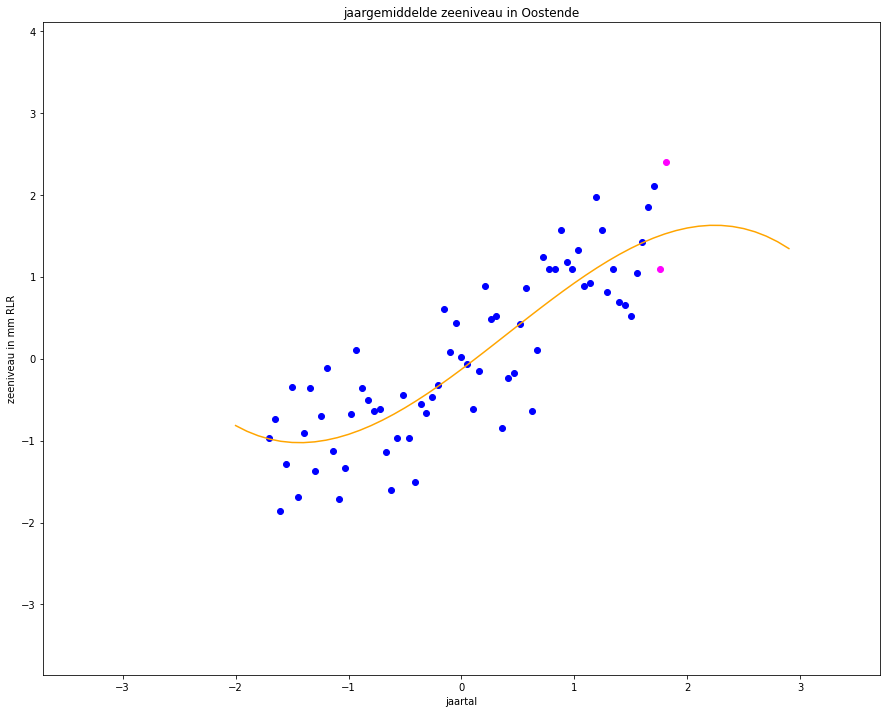

In [25]:
plt.figure(figsize=(15,12))      

# bereik zo kiezen opdat geschikt voor blik op toekomst
plt.xlim(x_std.min()-2, x_std.max()+2)
plt.ylim(y_std.min()-2, y_std.max()+2)
plt.title("jaargemiddelde zeeniveau in Oostende")
plt.xlabel("jaartal")
plt.ylabel("zeeniveau in mm RLR")

plt.scatter(x_std, y_std, color="blue", marker="o")
plt.plot(x_std_regressielijn, y3_std_regressielijn, color="orange")
plt.plot((2018-np.mean(x))/np.std(x), (7067-np.mean(y))/np.std(y), color="magenta", marker="o")
plt.plot((2019-np.mean(x))/np.std(x), (7129-np.mean(y))/np.std(y), color="magenta", marker="o")

plt.show()

Antwoord: Deze kromme is niet geschikt als trendlijn, want naarmate het jaartal toeneemt, daalt de kromme; dat is in contradictie met de stijgende trend. 

<div>
    <font color=#690027 markdown="1"> 
        <h2>5. Tiendegraadskromme als regressielijn</h2> 
    </font>
</div>

In [26]:
def tiendegr(x, a, b, c, d, e, f, g, h, i, j, k):
    """Voorschrift van veeltermfunctie van tiende graad met parameters a, b, c en d."""
    return a * x**10 + b * x**9 + c * x**8 + d * x**7 + e * x**6 + f * x**5 + g * x**4 + h * x**3 + i * x**2 + j * x + k

def tiendegraadsreg(x, y):
    popt, pcov = curve_fit(tiendegr, x, y)
    a, b, c, d, e, f, g, h, i, j, k = popt
    return a, b, c, d, e, f, g, h, i, j, k

In [27]:
a, b, c, d, e, f, g, h, i, j, k = tiendegraadsreg(x_std, y_std)

In [28]:
y10_std_regressielijn = tiendegr(x_std_regressielijn, a, b, c, d, e, f, g, h, i, j, k)

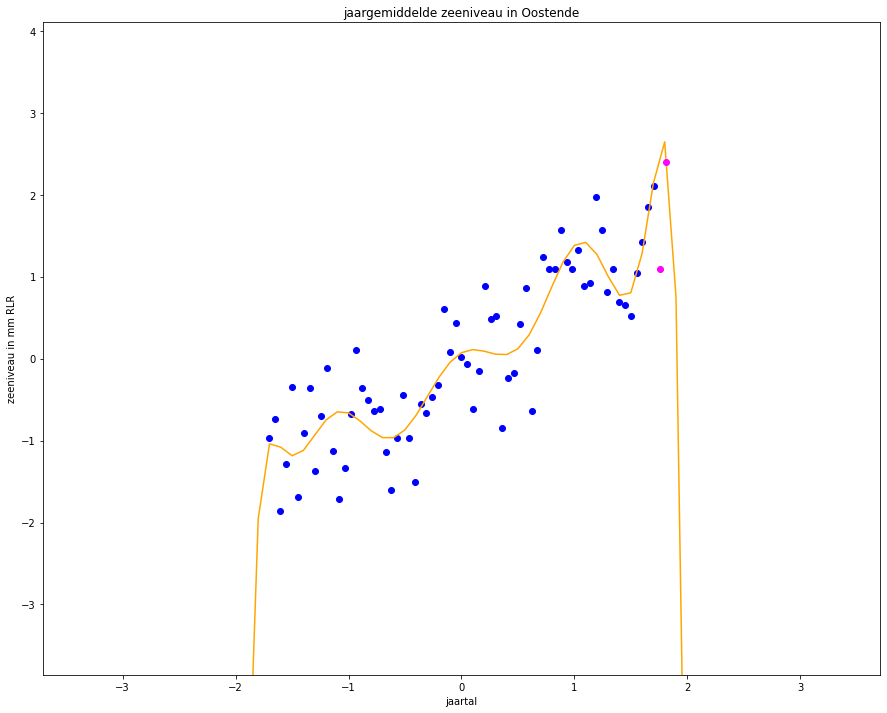

In [30]:
plt.figure(figsize=(15,12))      

# bereik zo kiezen opdat geschikt voor blik op toekomst
plt.xlim(x_std.min()-2, x_std.max()+2)
plt.ylim(y_std.min()-2, y_std.max()+2)
plt.title("jaargemiddelde zeeniveau in Oostende")
plt.xlabel("jaartal")
plt.ylabel("zeeniveau in mm RLR")

plt.scatter(x_std, y_std, color="blue", marker="o")
plt.plot(x_std_regressielijn, y10_std_regressielijn, color="orange")
plt.plot((2018-np.mean(x))/np.std(x), (7067-np.mean(y))/np.std(y), color="magenta", marker="o")
plt.plot((2019-np.mean(x))/np.std(x), (7129-np.mean(y))/np.std(y), color="magenta", marker="o")

plt.show()

Antwoord: Hoe hoger de graad, hoe beter de kromme bij de data past. Maar als trendlijn is deze tiendegraadskromme niet geschikt, want naarmate het jaartal toeneemt, daalt de kromme; dat is in contradictie met de stijgende trend. 

<div class="alert alert-box alert-info">
    Men zegt dat de kromme <b>overfit</b>. <br>
Met hoe meer men rekening houdt, hoe beter de kromme zal passen bij de data. Bij overfitting houdt men echter ook rekening met kenmerken van de data die niet relevant zijn voor het op te lossen probleem. 
    </div>

<div>
    <h2>Referentielijst</h2> 
</div>

[1] Vlaamse Milieumaatschappij (2019). Klimaatverandering. Geraadpleegd op 21 januari 2020 via <br> &nbsp; &nbsp; &nbsp; &nbsp; https://www.milieurapport.be/milieuthemas/klimaatverandering<br>
[2] Frank De Boosere. (2010). Ten opzichte van welk nulpunt gebeuren de hoogtemetingen voor landkaarten?<br> &nbsp; &nbsp; &nbsp; &nbsp; Geraadpleegd op 21 januari 2020 via https://www.frankdeboosere.be/vragen/vraag72.php <br> 
[3] Vlaamse Milieumaatschappij (2019). Zeeniveau. Geraadpleegd op 21 januari 2020 via https://www.milieurapport.be/milieuthemas/klimaatverandering/zeeklimaat/zeeniveau/zeeniveau <br>
[4] Vlaamse Milieumaatschappij (2021). Zeeniveau. Geraadpleegd op 12 november 2021 via <br> &nbsp; &nbsp; &nbsp; &nbsp;https://www.milieurapport.be/milieuthemas/klimaatverandering/zeeklimaat/zeeniveau

<div>
    <h2>Met steun van</h2> 
</div>

<img src="images/kikssteun.png" alt="Banner" width="800"/>

<img src="images/cclic.png" alt="Banner" align="left" width="100"/><br><br>
Notebook KIKS, zie <a href="http://www.aiopschool.be">AI Op School</a>, van F. wyffels & N. Gesquière is in licentie gegeven volgens een <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Naamsvermelding-NietCommercieel-GelijkDelen 4.0 Internationaal-licentie</a>.